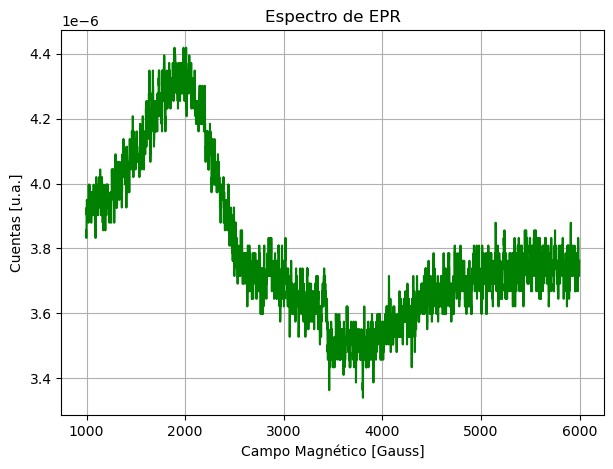

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
Dt= np.loadtxt('ZCr1600-100K.dat', usecols=(2,3))
Dt=Dt[:4096]
Dt=Dt[~np.isnan(Dt).any(axis=1)]
campo_mag=Dt[:,0]
Int=Dt[:,1]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Int, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()

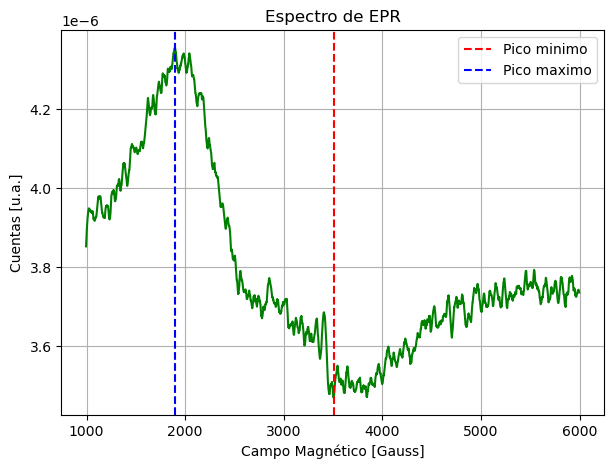

In [2]:
#Suavizado por Savitzky-Golay
Intsuave=savgol_filter(Int, 50, 3)
mini=min(Intsuave)
maxi=max(Intsuave)
campo_min=campo_mag[np.argmin(Intsuave)]
campo_max=campo_mag[np.argmax(Intsuave)]
anchopicopico=-campo_max+campo_min


plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
plt.axvline(campo_max,color='blue',linestyle='--',label='Pico maximo')
plt.legend()
plt.grid()
plt.show()

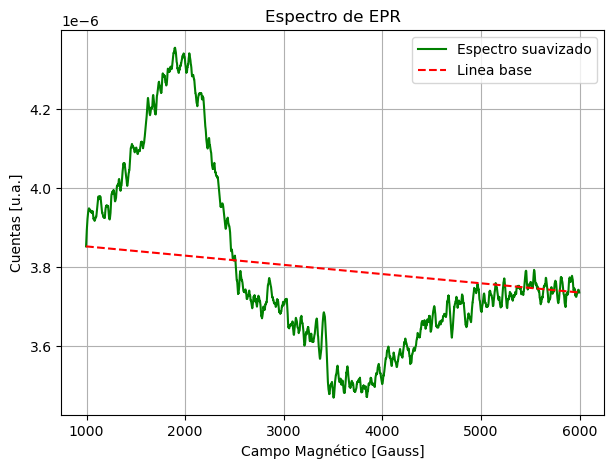

In [3]:
#Linea base
Pendiente=(Intsuave[-1]-Intsuave[0])/(campo_mag[-1]-campo_mag[0])
intercepto=Intsuave[0]-Pendiente*campo_mag[0]
lineabase=intercepto+(Pendiente*campo_mag)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green',label='Espectro suavizado')
plt.plot(campo_mag, lineabase, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()

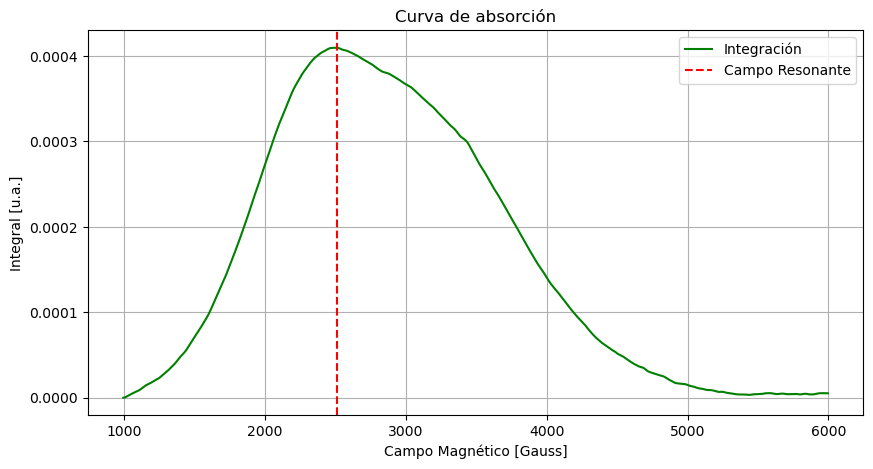

0.00040976830197901197

In [6]:
#Integración por trapecio
from scipy.integrate import simpson

integ = cumtrapz(Intsuave - lineabase, campo_mag, initial=0)
maxintet=campo_mag[np.argmax(integ)]
plt.figure(figsize=(10, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.axvline(maxintet, color='red', linestyle='--', label='Campo Resonante')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()
integ[np.argmax(integ)]-

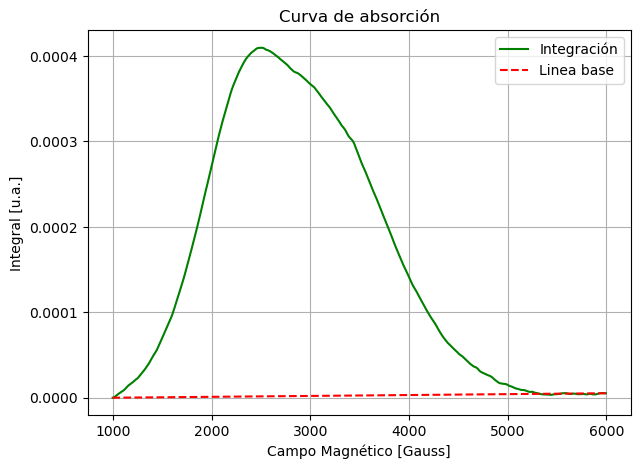

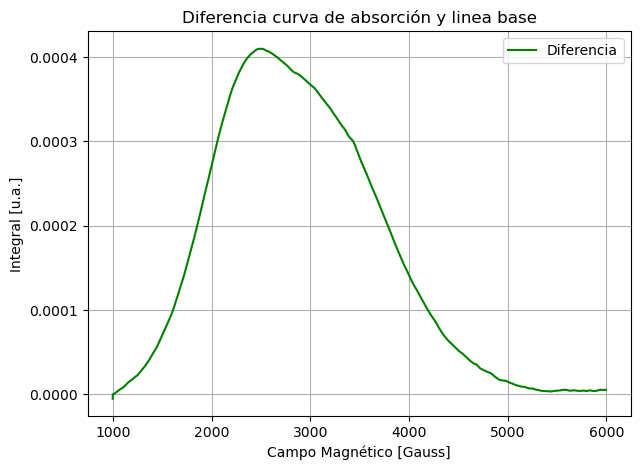

In [18]:
#Linea base
indmin=np.argmin(integ)
indlbx=[campo_mag[-1],campo_mag[indmin]]
indlby=[integ[-1],integ[indmin]]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.plot(indlbx, indlby, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()
#Resta linea base
resta=integ-np.interp(campo_mag, indlbx, indlby)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, resta, label='Diferencia', color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Diferencia curva de absorción y linea base')
plt.grid()
plt.legend()
plt.show()

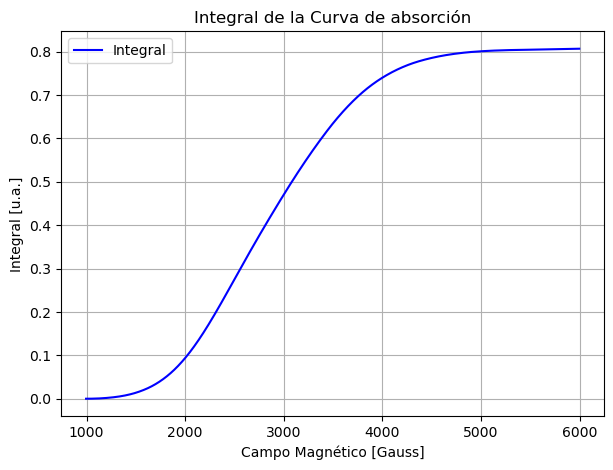

In [19]:
#Integral de la gráfica final

fint=cumtrapz(resta, campo_mag, initial=0)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, fint, label='Integral', color = 'blue')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Integral de la Curva de absorción')
plt.grid()
plt.legend()
plt.show()

# Intento 3

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.physics.quantum import TensorProduct
from scipy import constants

def Spin(*argv):
    if (len(argv)==1):
        return argv[0]
    else:
        Aa=np.zeros(len(argv))
        for ii in range (0,len(argv)):
            Aa[ii]=argv[ii]
        return Aa

def Tyr(om,alfa):
    kl=np.zeros(3)
    if om==2:
        kl[0]=alfa[0]
        kl[1]=alfa[0]
        kl[2]=alfa[1]
        return kl
    if om==1:
        kl[0]=alfa[0]
        kl[1]=alfa[0]
        kl[2]=alfa[0]
        return kl
    else:
        kl[0]=alfa[0]
        kl[1]=alfa[1]
        kl[2]=alfa[2]
        return kl

def Gs(*argv):
    KA=len(argv)
    if(KA==1):
        a=type(argv[0])
        if(a is list):
            om=len(argv[0])
            return Tyr(om,argv[0])
        if(a is float or a is int):
            return argv[0]
        if(a is np.matrix):
            return argv[0]
    else:
        AK=np.empty([KA], dtype=list)
        for ij in range(0,KA):
            a=type(argv[ij])
            if(a is list):
                om=len(argv[ij])
                AK[ij]=Tyr(om,argv[ij])
            if(a is float or a is int):
                AK[ij]=argv[ij]
            if(a is np.matrix):
                AK[ij]=argv[ij]
        return AK

def Al(*argv):
    ñl=len(argv)
    if(ñl==1):
        return argv[0]
    else:
        AÑ=np.empty([ñl], dtype=list)
        for jk in range(0,ñl):
            aq=type(argv[jk])
            if(aq is np.matrix):
                AÑ[jk]=argv[jk]
            if(aq is float or aq is int):
                AÑ[jk]=argv[jk]
        return AÑ

def Ds(*argv):
    KAA=len(argv)
    if(KAA==1):
        aA=type(argv[0])
        if(aA is list):
            om=len(argv[0])
            return Tyr(om,argv[0])
        if(aA is float or aA is int):
            return argv[0]
        if(aA is np.matrix):
            return argv[0]
    else:
        AK=np.empty([KAA], dtype=list)
        for ij in range(0,KAA):
            aA=type(argv[ij])
            if(aA is list):
                om=len(argv[ij])
                AK[ij]=Tyr(om,argv[ij])
            if(aA is float or aA is int):
                AK[ij]=argv[ij]
            if(aA is np.matrix):
                AK[ij]=argv[ij]
        return AK



In [ ]:
y=Spin(5/2,2)
g=Gs(1,2,[0.5,0.3])
A=Al(np.matrix('1,2,3;5,6,7;8,9,10'))
D=Ds(5.2,[5,3,4])
g

In [22]:
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
A=eye(3)*5
B=np.matrix('1,2,3;5,6,7;8,9,10')
B[0,0]
AD=Matrix([[1, 5, 3],[26, 7, 59],[1, 2, 8]])

array([[1, 0, 0],
       [0, 7, 0],
       [0, 0, 8]], dtype=object)

In [25]:
def HaZe(gs,S,H):
    B=5 #beta
    #H=Hz
    T=type(g)
    if(T is float or T is int):
        W=B*H*gs*S
        return W
    if(T is list):
        W==B*H*gs[2]*S
        return W
    if(T is np.matrix):
        S1,S2,S3=Pauli(S)
        W=B*H*(gs[0,2]*S1+gs[1,2]*S2+gs[2,2]*S3)
        RP=W.eigenvals()
        J =np.array(list( RP.items()))
        WA=np.zeros(len(J))
        for u in range(0,len(J)):
            WA[u]=J[u][0]
        return WA
        
def HaZn(gs,H,be,I):
    HAD=-gs*be*H*I
    return HAD
    
def HaHF(S,A,I):
    T1=type(A)
    S1,S2,S3=Pauli(S)
    I1,I2,I3=Pauli(I)
    if(T1 is float or T1 is int):
        KAL=A*(TensorProduct(S1, I1)+TensorProduct(S2, I2)+TensorProduct(S3, I3))
        EV=KAL.eigenvals()
        return EV
    if(T1 is list):
        M21=(A[0]*TensorProduct(S1, I1))+(A[1]*TensorProduct(S2, I2))+(A[2]*TensorProduct(S3, I3))
        return M21
    if(T1 is np.matrix):
        F11=(A[0,0]*S1+A[1,0]*S2+A[2,0]*S3)
        F12=(A[0,1]*S1+A[1,1]*S2+A[2,1]*S3)
        F13=(A[0,2]*S1+A[1,2]*S2+A[2,2]*S3)
        FA1=TensorProduct(F11,I1)
        FA2=TensorProduct(F12,I2)
        FA3=TensorProduct(F13,I3)
        FA=FA1+FA2+FA3
        return FA

def HaQI(I,Q):
    #For I>1/2, with Q traceless and symmetric
    I11,I22,I33=Pauli(I)
    I112,I222,I333=I11*I11,I22*I22,I33*I33
    WTR=(Q[0,0]*I112+Q[1,1]*I222+Q[2,2]*I333)+(Q[0,1]*((I11*I22)+(I22*I11)))+(Q[1,2]*((I22*I33)+(I33*I22)))+(Q[2,0]*((I33*I11)+(I11*I33)))
    return WTR


def Pauli(s):
    #Defines the pauli matrix for all s values:
    Sx,Sy,Sz=zeros(int(2*s+1),int(2*s+1)),zeros(int(2*s+1),int(2*s+1)),zeros(int(2*s+1),int(2*s+1))
    AG=int(2*s)
    Sz[0,0]=(s+1-1)
    Sz[AG,AG]=(s-AG)
    Sx[0,1]=0.5*(np.sqrt(2*s))
    Sx[AG,AG-1]=0.5*(np.sqrt((s+1)*(2*AG)-(AG+1)*(AG)))
    Sy[0,1]=-0.5*(np.sqrt(2*s))*1j
    Sy[AG,AG-1]=0.5*(np.sqrt((s+1)*(2*AG)-(AG+1)*(AG)))*1j
    for a in range(1,int(2*s)):
        Sz[a,a]=(s-a)
        Sx[a,a+1]=0.5*np.sqrt(2*(s+1)*(a+1)-(a+1)*(a+2))
        Sx[a,a-1]=0.5*np.sqrt(2*(s+1)*(a)-(a+1)*(a))
        Sy[a,a+1]=-0.5*np.sqrt(2*(s+1)*(a+1)-(a+1)*(a+2))*1j
        Sy[a,a-1]=0.5*np.sqrt(2*(s+1)*(a)-(a+1)*(a))*1j
    return Sx,Sy,Sz

def HFS1(S,D):
    #For rombic and axial systems
    #For powder aka. Disorder directions
    S1,S2,S3=Pauli(S)
    LAD=(D[0,0]*S1*S1)+(D[1,1]*S2*S2)+(D[2,2]*S3*S3)+(D[0,1]*((S1*S2)+(S2*S1)))+(D[1,2]*((S2*S3)+(S3*S2)))+(D[0,2]*((S3*S1)+(S1*S3)))
    return LAD
    #LSA=D*(S3*S3-((S*(S+1))/3))+0

    
H=90
S=Spin(1/2)
g=Gs(np.matrix('1,1,1;1,1,1;1,1,1'))
J=HaZe(g,S,H)
KS=np.matrix('1,2,9;4,55,6;7,8,9')
KS[0,1]
HaHF(S,[5,2,3],1/2)
HFS1(S,KS)

Matrix([
[16.25,     0],
[    0, 16.25]])

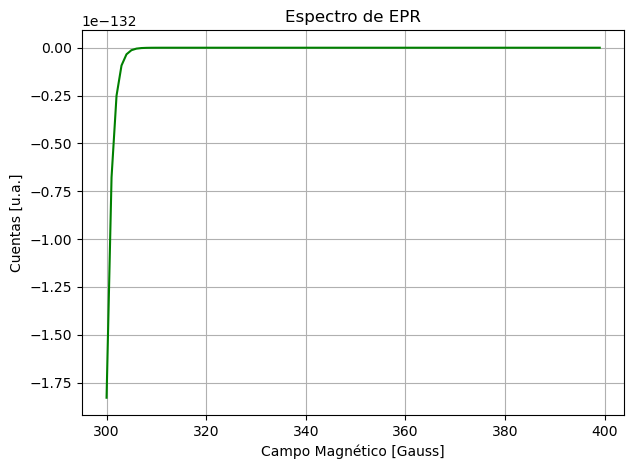

In [51]:
#intento de intensidad:
beta=0.0054
g=2.003
S=1/2
ms=1
T=200
Kb=0.005
B=np.zeros(100)
I=np.zeros(100)
for i in range(0,100):
    B[i]=300+i
    I[i]=beta*beta*B[i]*g*(S*(S+1)-ms*(ms+1))*beta*B[i]*g/(2*Kb*T)*(np.exp(-B[i]))
plt.figure(figsize=(7, 5))
plt.plot(B, I, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()

# Line

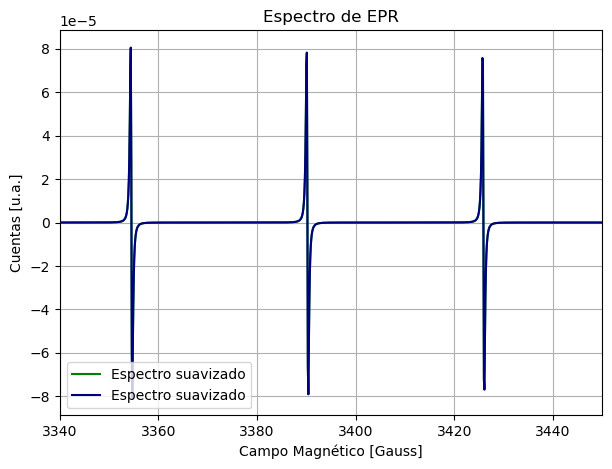

0.0

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.physics.quantum import TensorProduct
from scipy import constants

v=9.5*10**9
h=6.6262*(10**-34)
g=2.003
ge=2.0023
A=100*10**6

beta=9.27*(10**-28)
H1=(h*v)/(g*beta)
H2=h*((v-A)/(g*beta))
H3=h*((v+A)/(g*beta))
#Lorentziana

Hpp=0.3
ym=np.pi*np.sqrt(3)*Hpp/(2*A)
ymp=3*ym*40*100/(4*Hpp)
N=4096
B=np.zeros(N)
I1=np.zeros(N)
I2=np.zeros(N)
I3=np.zeros(N)
I4=np.zeros(N)
for i in range(0,N):
    B[i]=3300+i*0.1
    I1[i]=-(32*ymp*(B[i]-H1)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H1),2)))),2)
    I2[i]=-(32*ymp*(B[i]-H2)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H2),2)))),2)
    I3[i]=-(32*ymp*(B[i]-H3)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H3),2)))),2)
    I4[i]=-(32*ymp*(B[i]-H1)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H1),2)))),2)-(32*ymp*(B[i]-H2)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H2),2)))),2)-(32*ymp*(B[i]-H3)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H3),2)))),2)

    
plt.figure(figsize=(7, 5))
plt.plot(B, I1+I2+I3, color = 'green',label='Espectro suavizado')
plt.plot(B, I4, color = 'navy',label='Espectro suavizado')
#plt.plot(B, I2, color = 'red',label='Linea base')
#plt.plot(B, I3, color = 'blue',label='Linea base')
plt.xlabel('Campo Magnético [Gauss]')
plt.xlim((3340, 3450))
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()
np.mean(np.power(I4-(I1+I2+I3),2))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
import random

# Montecarlo

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

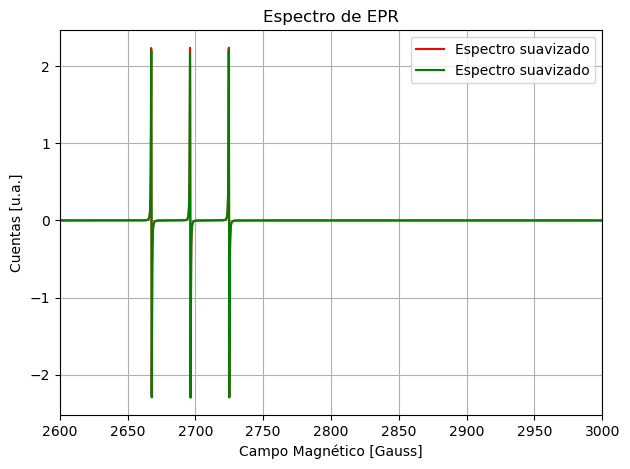

In [182]:
def MCiso(g, g11, A, A11, Hpp, H11, exp, ref, frec, campc, swe):
    iu=len(exp)
    xi=27
    h=6.6262*(10**-34)
    beta=9.27*(10**-28)
    I4=np.zeros(iu)
    B=np.zeros(N)
    RE=campc-(swe)
    A=A*10**6
    A11=A11*10**6
    A11=int(A11)
    ia=0
    io=0
    while (xi>ref):
        G=np.random.uniform(-g11,g11)+g
        CH=random.randrange(-A11, A11, 1)+A
        lw=np.random.uniform(-H11,H11)+Hpp
        H1=(h*frec)/(G*beta)
        H2=h*((frec-CH)/(G*beta))
        H3=h*((frec+CH)/(G*beta))
        for ia in range(0,iu):
            B[ia]=RE+ia*0.1
            I4[ia]=-(1/(np.pi))*(2*lw*(B[ia]-H1))/np.power((np.power(lw,2)+np.power(B[ia]-H1,2)),2)-(1/(np.pi))*(2*lw*(B[ia]-H2))/np.power((np.power(lw,2)+np.power(B[ia]-H2,2)),2)-(1/(np.pi))*(2*lw*(B[ia]-H3))/np.power((np.power(lw,2)+np.power(B[ia]-H3,2)),2)
        Xi=np.power(I4-exp,2)
        x0=xi
        xi=np.mean(Xi)#Xi[np.argmax(Xi)]
        print(io)
        if(x0>xi):
            gg=G
            cc=CH
            ll=lw
        io+=1
        if(io>20000):
            break
    print('los mejores valores son:', gg, cc, ll)
    return I4
     
v=9.43*10**9
h=6.6262*(10**-34)
g=2.5
A=100*10**6
Hpp=0.3
beta=9.27*(10**-28)
H1=(h*v)/(g*beta)
H2=h*((v-A)/(g*beta))
H3=h*((v+A)/(g*beta))
N=4000
B=np.zeros(N)
I=np.zeros(N)
for i in range(0,N):
    B[i]=2600+i*0.1
    I[i]=-(1/(np.pi))*(2*Hpp*(B[i]-H1))/np.power((np.power(Hpp,2)+np.power(B[i]-H1,2)),2)-(1/(np.pi))*(2*Hpp*(B[i]-H2))/np.power((np.power(Hpp,2)+np.power(B[i]-H2,2)),2)-(1/(np.pi))*(2*Hpp*(B[i]-H3))/np.power((np.power(Hpp,2)+np.power(B[i]-H3,2)),2)
        
    
IA=MCiso(2.5,0.1,100, 0.2, 0.3, 0, I,10**-3,v,2800,200)
#Lorentziana
plt.figure(figsize=(7, 5))
plt.plot(B, IA, color = 'r',label='Espectro suavizado')
plt.plot(B, I, color = 'green',label='Espectro suavizado')
#plt.plot(B, IA, color = 'navy',label='Espectro suavizado')
#plt.plot(B, I2, color = 'red',label='Linea base')
#plt.plot(B, I3, color = 'blue',label='Linea base')
plt.xlabel('Campo Magnético [Gauss]')
plt.xlim((2600, 3000))
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()

# los mejores valores son: 2.499952920220926 100250856.68510765 0.25033642943198825

los mejores valores son: 2.5000074546468856 100081451.40601051 0.30988990971091157

In [167]:
A=100*10**6
A11=2*10**6
random.randrange(-A11, A11, 1)+A

100606865

In [43]:
#Expresiones para calcular los campos resonantes
A=100*10**6
g=2.003
beta=9.27*(10**-28)
h=6.6262*(10**-34)
v=9.5*10**9
I=1
m=1
O1=A/(g*beta)
O2=1/(1-(A/(2*h*v))**2)
O3=np.sqrt((1-(A/(2*h*v))**2)*(((h*v/A)**2)-((I+0.5)**2))+m**2)
O4=-m-O3
O5=O1*O2*O4
O5

10170.650173606902

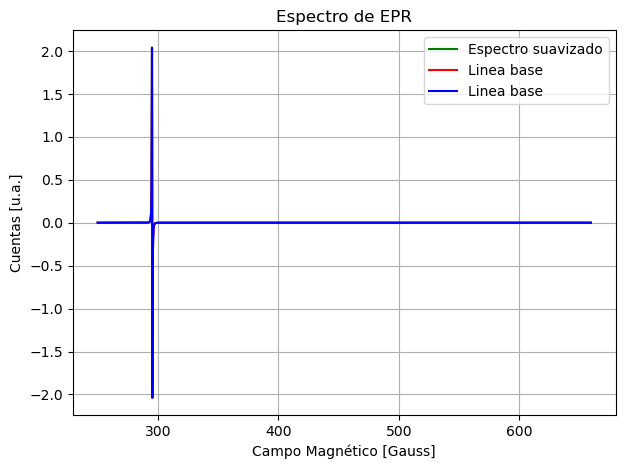

array([250. , 250.1, 250.2, ..., 659.3, 659.4, 659.5])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.physics.quantum import TensorProduct
from scipy import constants

v=9.5*10**9
h=6.6262*(10**-34)
g=2.3
A=100

be=9.27*(10**-21)
H1=(h*v)/(g*beta)
H2=h*((v-A)/(g*beta))
H3=h*((v+A)/(g*beta))
#Lorentziana

Hpp=0.3
ym=np.pi*np.sqrt(3)*Hpp/(2*1)
ymp=3*ym/(4*Hpp)
N=4096
B=np.zeros(N)
I1=np.zeros(N)
I2=np.zeros(N)
I3=np.zeros(N)
for i in range(0,N):
    B[i]=250+i*0.1
    I1[i]=-(32*ymp*(B[i]-H1)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H1),2)))),2)
    I2[i]=-(32*ymp*(B[i]-H2)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H2),2)))),2)
    I3[i]=-(32*ymp*(B[i]-H3)*(np.power(Hpp,3)))/np.power(((3*(np.power(Hpp,2)))+(4*(np.power((B[i]-H3),2)))),2)

    
plt.figure(figsize=(7, 5))
plt.plot(B, I1, color = 'green',label='Espectro suavizado')
plt.plot(B, I2, color = 'red',label='Linea base')
plt.plot(B, I3, color = 'blue',label='Linea base')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()
B

In [ ]:
from sympy import Matrix
from sympy.physics.quantum import TensorProduct

m1 = Matrix([[1,2],[3,4]])
m2 = Matrix([[1,0],[0,1],[3,2]])
TensorProduct(m1, m2)

In [ ]:
isd=np.matrix('1,2,3;5,6,7;8,9,10')
a=type(isd)
a is np.matrix

In [ ]:
sj=np.empty([2], dtype=list)
sj[0]=np.array([5,2])
sj[1]=np.array([5,2])
sj[0][0]

In [ ]:
np.array([[1,2],[65,6]])+np.array([[1,2],[65,6]])-np.array([[1,2],[65,6]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
from scipy import constants
#Determinación del tensor g

#opción 1
def Syg(a=np.array([[0],[0],[0],[0],[0],[0]])):
    t=len(a)    #Number of electron's spins
    for i in range(0,t):
        a[i]=laz(a[i])
    return a

#opción 2


def Sygs(*a):
    t=len(a) #Number of electron's spins
    k=[]
    for i in range (0,t):
        k.append(a[i])
        k[i]=laz(k[i])
    return k

def laz(a=np.array):
    if len(a)==2:
        a=[a[0],a[0],a[1]]
        return a
    else:
        return a
    

def Sysp(*s):
    l=len(s) #Number of electrons
    if l==1:
        return [s[0]]
    else:
        ak=[]
        for i in range (0,l):
            ak.append(s[i])
        return ak


In [ ]:
#opción 1
def Syg(a=np.array([[0],[0],[0],[0],[0],[0]])):
    t=len(a)    #Number of electrons
    for i in range(0,t):
        a[i]=laz(a[i])
    return a

#opción 2


def Sygs(*a):
    t=len(a) #Number of electrons
    k=[]
    for i in range (0,t):
        k.append(a[i])
        k[i]=laz(k[i])
    return k

def laz(a=np.array):
    if len(a)==2:
        a=[a[0],a[0],a[1]]
        return a
    else:
        return a

print(Syg([[2.03,0,0],[0,2.03]]))


Sygs([2.03,0,0],[0,2.03])
#opción 2

def Sysp(*s):
    l=len(s) #Number of electrons
    if l==1:
        return [s[0]]
    else:
        ak=[]
        for i in range (0,l):
            ak.append(s[i])
        return ak
    
Sysp(0.5,5/8)

In [ ]:
def LCA(lwpp,A,g,v,pt=1024,lim=[50,50]):
    Gamma=np.sqrt((np.sqrt(3)*3)/(8*np.pi*lwpp))
    v=v*10**9
    W=constants.h*A
    b=9.2741*(10**(-21))
    l=g*b
    Hr=constants.h*v/(l)  #Campo resonante
    HrA=round(Hr)
    p=(lim[1]/2)+HrA
    H=np.linspace(HrA-(lim[0]/2),p,pt)
    y=np.zeros(pt)
    yp=np.zeros(pt)
    for u in range(0,pt):
        y[u]=Gamma/(np.pi*(Gamma**2+(H[u]-Hr)**2))
        yp[u]=-(2*Gamma*(H[u]-Hr))/(np.pi*((Gamma**2+(H[u]-Hr)**2))**2)
    return H,y,yp
def GC(lwpp,A,g,v,pt=1024,lim=[300,300]):
    Gamma=np.sqrt(np.log(2)/2)*lwpp
    print(Gamma)
    return Gamma
    
    
    
    
    
H,y,yp=LCA(9,560,4.003,9.6,500,[10,10])
plt.figure(figsize=(7,5))
plt.plot(H, yp,'r')
plt.plot(H, y,'b')
plt.legend(('${J}_0(x)$', '${J}_1(x)$',
'${J}_2(x)$'), loc = 0)
#plt.xlim((0, 20))
plt.title('Funciones de Bessel integradas')
plt.xlabel('$x$')
plt.ylabel('${J}_m (x)$')
plt.grid()

In [ ]:
def Hze(S,g,H):
    #En ergs/gauss
    Mb=9.27414533*pow(10,-17)    
    M=((S[0]*g[0])+(S[1]*g[1])+(S[2]*g[2]))
    K=Mb*H
    return K*M
def Hnze(I,gn,H):
    #En ergs/gauss
    Mn=5.050783699*pow(10,-24)  
    K=gn*(I[0]+I[1]+I[2])
    W=H*Mn
    return K*W

S=[1/2,1/2,1/2]
g=[0.53,0.53,0.53]
Hze(S,g,3000)
Hnze([6,5,4],0.04,3000)

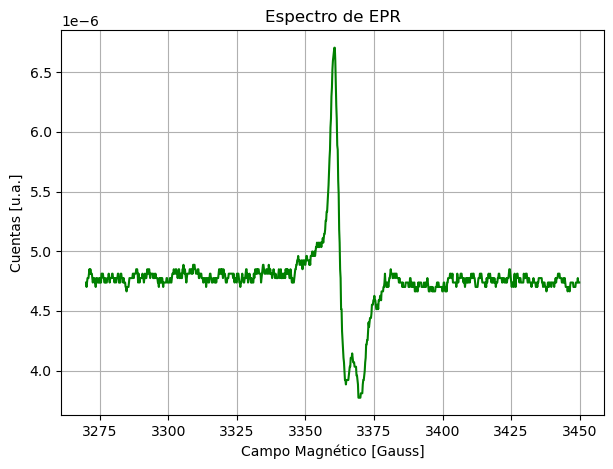

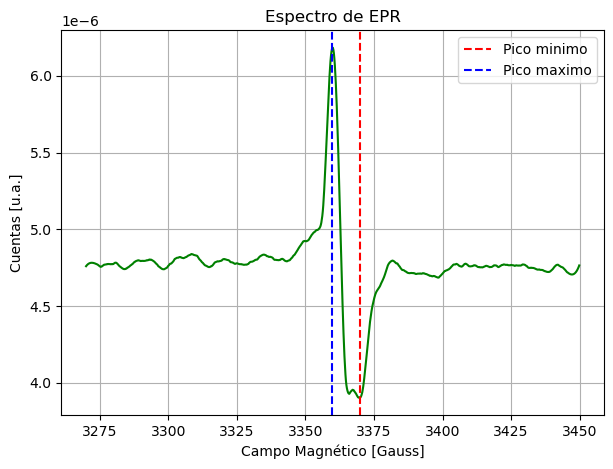

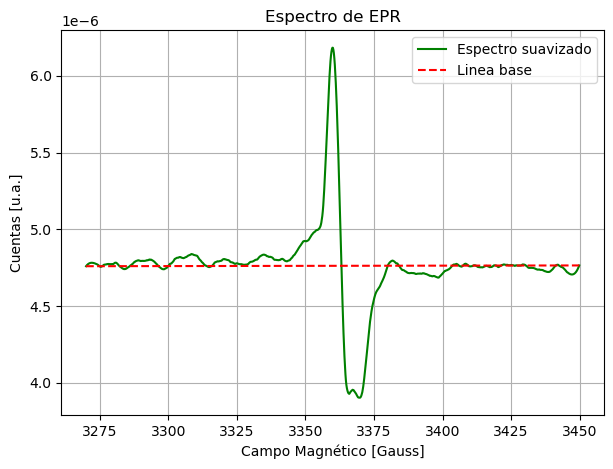

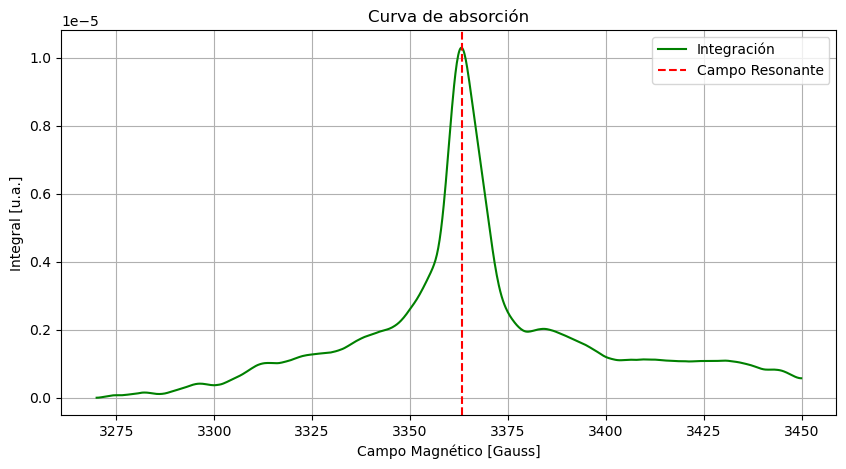

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
Dt= np.loadtxt('110-M1.dat', usecols=(2,3))
Dt=Dt[:1025]
Dt=Dt[~np.isnan(Dt).any(axis=1)]
campo_mag=Dt[:,0]
Int=Dt[:,1]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Int, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()
#Suavizado por Savitzky-Golay
Intsuave=savgol_filter(Int, 50, 3)
mini=min(Intsuave)
maxi=max(Intsuave)
campo_min=campo_mag[np.argmin(Intsuave)]
campo_max=campo_mag[np.argmax(Intsuave)]
anchopicopico=-campo_max+campo_min


plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
plt.axvline(campo_max,color='blue',linestyle='--',label='Pico maximo')
plt.legend()
plt.grid()
plt.show()
#Linea base
Pendiente=(Intsuave[-1]-Intsuave[0])/(campo_mag[-1]-campo_mag[0])
intercepto=Intsuave[0]-Pendiente*campo_mag[0]
lineabase=intercepto+(Pendiente*campo_mag)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green',label='Espectro suavizado')
plt.plot(campo_mag, lineabase, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()
#Integración por trapecio
from scipy.integrate import simpson

integ = cumtrapz(Intsuave - lineabase, campo_mag, initial=0)
maxintet=campo_mag[np.argmax(integ)]
plt.figure(figsize=(10, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.axvline(maxintet, color='red', linestyle='--', label='Campo Resonante')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()


In [38]:
v=9.43*10**9
h=6.6262*(10**-34)
A=100
#g=2
be=9.27*(10**-28)
g=v*h/(maxintet*be)
#Hj=v*h/(be*g)
g

2.0042336280608573

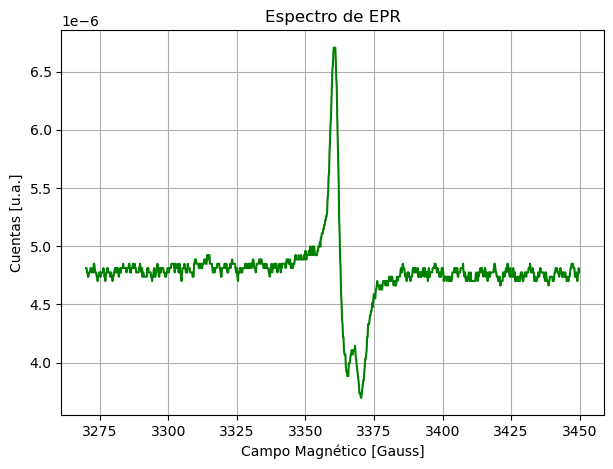

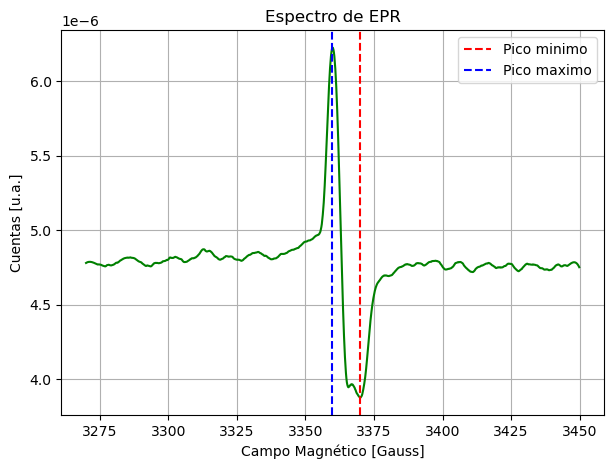

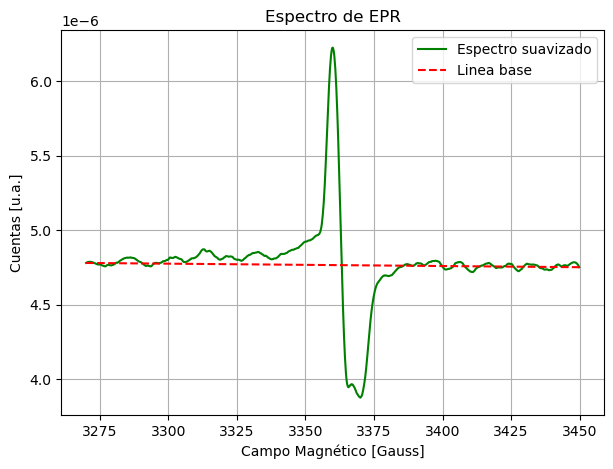

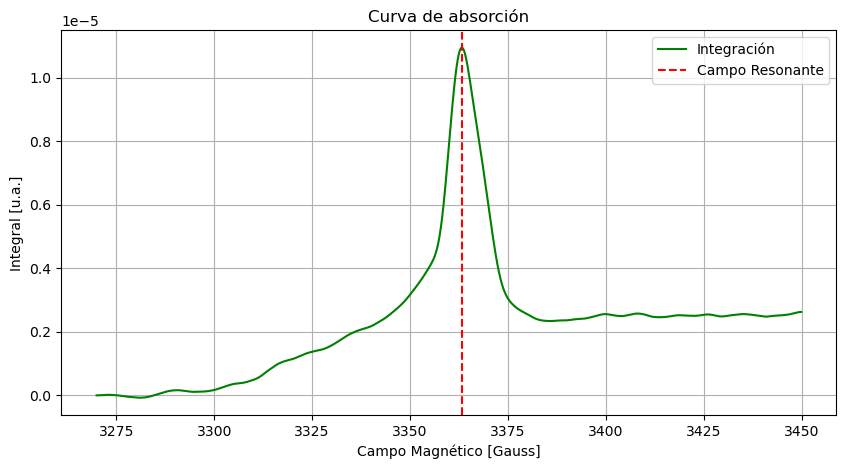

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz
import pandas as pd
Dt= np.loadtxt('110-M2.dat', usecols=(2,3))
Dt=Dt[:1025]
Dt=Dt[~np.isnan(Dt).any(axis=1)]
campo_mag=Dt[:,0]
Int=Dt[:,1]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Int, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.grid()
plt.show()
#Suavizado por Savitzky-Golay
Intsuave=savgol_filter(Int, 50, 3)
mini=min(Intsuave)
maxi=max(Intsuave)
campo_min=campo_mag[np.argmin(Intsuave)]
campo_max=campo_mag[np.argmax(Intsuave)]
anchopicopico=-campo_max+campo_min


plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.axvline(campo_min,color='red',linestyle='--',label='Pico minimo')
plt.axvline(campo_max,color='blue',linestyle='--',label='Pico maximo')
plt.legend()
plt.grid()
plt.show()
#Linea base
Pendiente=(Intsuave[-1]-Intsuave[0])/(campo_mag[-1]-campo_mag[0])
intercepto=Intsuave[0]-Pendiente*campo_mag[0]
lineabase=intercepto+(Pendiente*campo_mag)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, Intsuave, color = 'green',label='Espectro suavizado')
plt.plot(campo_mag, lineabase, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Cuentas [u.a.]')
plt.title('Espectro de EPR')
plt.legend()
plt.grid()
plt.show()
#Integración por trapecio
from scipy.integrate import simpson

integ = cumtrapz(Intsuave - lineabase, campo_mag, initial=0)
maxintet=campo_mag[np.argmax(integ)]
plt.figure(figsize=(10, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.axvline(maxintet, color='red', linestyle='--', label='Campo Resonante')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()

In [45]:
v=9.43*10**9
h=6.6262*(10**-34)
A=100
g=2
be=9.27*(10**-28)
g=v*h/(maxintet*be)
#Hj=v*h/(be*g)
g

2.0042336280608573

In [8]:
#Integración por trapecio
from scipy.integrate import simpson

integ = cumtrapz(Intsuave - lineabase, campo_mag, initial=0)
maxintet=campo_mag[np.argmax(integ)]
plt.figure(figsize=(10, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.axvline(maxintet, color='red', linestyle='--', label='Campo Resonante')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()

NameError: name 'lineabase' is not defined

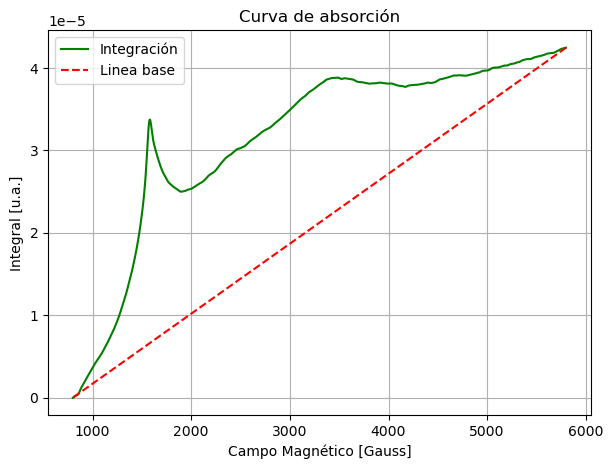

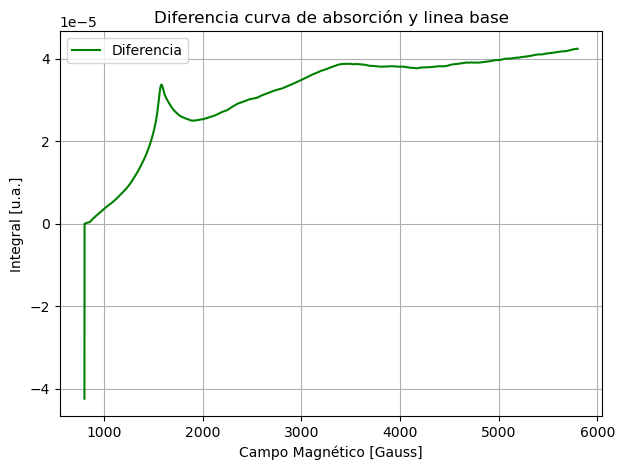

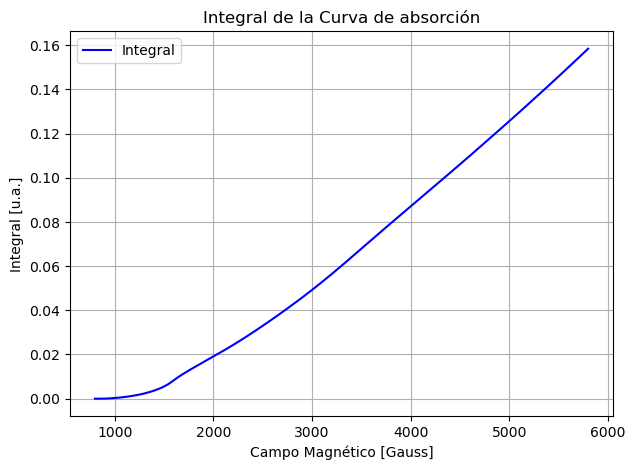

In [14]:
#Linea base
indmin=np.argmin(integ)
indlbx=[campo_mag[-1],campo_mag[indmin]]
indlby=[integ[-1],integ[indmin]]
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, integ, label='Integración', color = 'green')
plt.plot(indlbx, indlby, color = 'red',label='Linea base',linestyle='--')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Curva de absorción')
plt.grid()
plt.legend()
plt.show()
#Resta linea base
resta=integ-np.interp(campo_mag, indlbx, indlby)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, resta, label='Diferencia', color = 'green')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Diferencia curva de absorción y linea base')
plt.grid()
plt.legend()
plt.show()
#Integral de la gráfica final

fint=cumtrapz(resta, campo_mag, initial=0)
plt.figure(figsize=(7, 5))
plt.plot(campo_mag, fint, label='Integral', color = 'blue')
plt.xlabel('Campo Magnético [Gauss]')
plt.ylabel('Integral [u.a.]')
plt.title('Integral de la Curva de absorción')
plt.grid()
plt.legend()
plt.show()